<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-David-Nicolas364/blob/main/10nov/REgresion_log.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Cargamos los datos que vamos a trabajar.

In [3]:
#Los datos corresponden a un subset del dataset cats vs dogs de https://www.kaggle.com/c/dogs-vs-cats
files=glob.glob('/content/drive/MyDrive/Cosas ML/train/*')

In [4]:
len(files)

4340

In [5]:
#numero de pixeles para nuestras imágenes.
num_px=64

Veamos algunas de las imagenes

Preparamos el dataset de entrenamiento.

In [6]:
train_x=[]
train_y=[]
for file in files[:100]:
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    train_x.append(data)
    img.close()
    if 'dog' in file:
        train_y.append(1)
    if 'cat' in file:
        train_y.append(0)
train_y=np.asarray(train_y)
train_x=np.asarray(train_x)

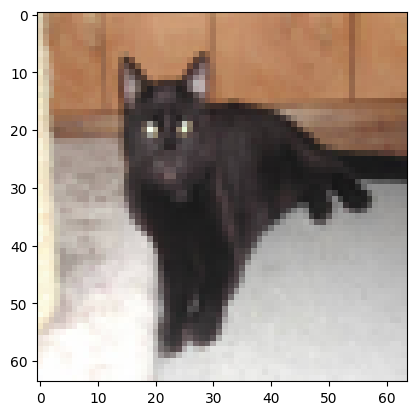

In [7]:
plt.imshow(train_x[0])


Preparamos el dataset de prueba

In [9]:
test_x=[]
test_y=[]
for file in files[100:]:
    #print(file)
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    test_x.append(data)
    img.close()
    if 'dog' in file:
        test_y.append(1)
    if 'cat' in file:
        test_y.append(0)
test_y=np.asarray(test_y)
test_x=np.asarray(test_x)

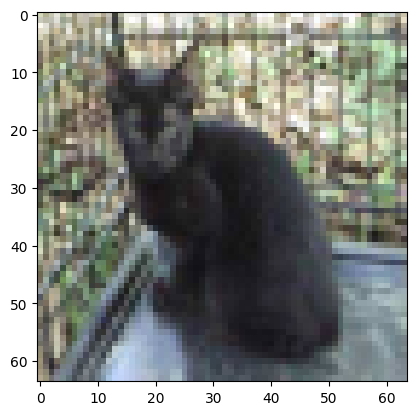

In [10]:
plt.imshow(test_x[1])

Hacemos una transformación de los arreglos que contienen las imagenes para que sean arreglos de una dimensión.

In [11]:
train_x_flatten = train_x.reshape(train_x.shape[0], -1).T

test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

train_set_y=train_y.reshape((1,train_y.shape[0]))
test_set_y=test_y.reshape((1,test_y.shape[0]))

In [91]:
np.shape(train_set_y)

(1, 100)

In [96]:
1/len(train_set_y[0,:])

0.01

Normalizamos las imágenes

In [12]:
train_set_x= train_x_flatten/255
test_set_x= test_x_flatten/255

Ya esta listo nuestro set de datos para poder trabajar con el.

In [13]:
np.shape(train_set_x)

(12288, 100)

In [72]:
#y_hat
def y_gorrito(x,w,b):
  sig = 1/(1+np.exp(-(w*x+b)))
  return sig

In [46]:
#z
def z(x):
  weights = np.random.rand(x.shape[0])
  b = np.zeros(x.shape[1])
  z=weights*x + b
  return z

In [125]:
#Calculo del costo
def costo(y_hat,y):
  cst = (1/len(y[0,:]))*(np.sum(y*np.log(y_hat)+(1-y)*np.log(1-y_hat)))
  return -cst

In [126]:
#Gradiente Descendiente
def  grad(alph,x,y,iter):
  cost=[]
  w = np.atleast_2d(np.random.rand(x.shape[0])).T
  b = np.zeros(x.shape[1])
  for i in range(iter):
    w=w-alph*(1/len(y))*x*(y_gorrito(x,w,b)-y)
    b=b-alph*(1/len(y))*(y_gorrito(x,w,b)-y)
    cost.append(costo(y_gorrito(x,w,b),y))
  return w,b,cost

In [146]:
w,b,costot = grad(1e-2,train_set_x,train_set_y, 1000)

In [147]:
w

array([[-1.30261268, -0.8829442 , -0.4911188 , ..., -0.38932728,
        -0.98531719, -0.78947305],
       [-1.33480481, -0.97031426, -0.81618057, ..., -0.52946844,
        -1.02070703, -0.83575549],
       [-0.57846071, -0.11098995, -0.2225997 , ...,  0.33263431,
        -0.12726178,  0.27829742],
       ...,
       [-0.90670427, -0.42976939, -1.03933556, ..., -0.51990619,
        -0.80008889, -0.31933617],
       [-1.23778854, -0.86894389, -1.33308473, ..., -0.95312208,
        -1.05853119, -0.52884034],
       [-1.11892823, -0.68224463, -1.22752826, ..., -0.75748708,
        -0.83371466, -0.17654866]])

In [148]:
b

array([[-1.61219685, -1.95474184, -2.11149284, ..., -2.13612924,
        -1.89347612, -2.00232308],
       [-1.6075285 , -1.91864353, -2.00083552, ..., -2.10643706,
        -1.88693109, -1.99151362],
       [-2.11096134, -2.26200225, -2.23792475, ..., -2.29530626,
        -2.25891015, -2.2963277 ],
       ...,
       [-1.90272567, -2.15134633, -1.78823376, ..., -2.11847384,
        -1.97674958, -2.18459202],
       [-1.66296191, -1.95346828, -1.54237504, ..., -1.90294239,
        -1.8286105 , -2.09798161],
       [-1.74829165, -2.03770738, -1.62988577, ..., -2.00188069,
        -1.96069166, -2.18085614]])

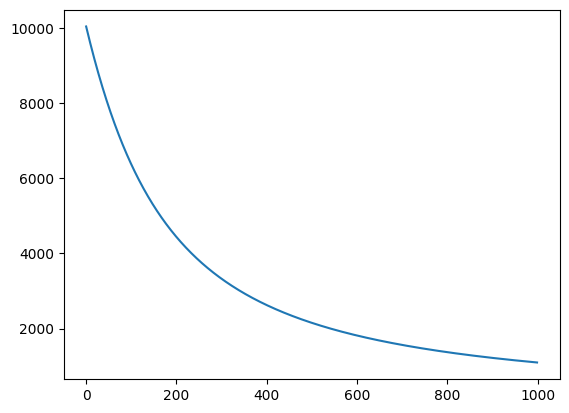

In [150]:
plt.plot(range(1000),costot)